In [1]:
import os

path_dict = {
    'Davis': {
        'warm': {
            'MMSG-DTA': '/data/qingyuyang/MMSG-DTA/results/20251025_202754_davis_warm_fold0/test_logits.csv',
            'MomeDTA': '/data/qingyuyang/dta_ours/output/davis/warm_fold0/moe_fullemb_1d2d3d_MANnew_0.0001/csv_log/version_0/test_logits.csv'
        },
        'cold-start': {
            'MMSG-DTA': '/data/qingyuyang/MMSG-DTA/results/20251025_215151_davis_novel_pair_fold0/test_logits.csv',
            'MomeDTA': '/data/qingyuyang/dta_ours/output/davis/novel_pair_fold0/moe_fullemb_1d2d3d_MANnew_16_0.0001/csv_log/version_0/test_logits.csv'
        }
    },
    'Kiba': {
        'warm': {
            'MMSG-DTA': '/data/qingyuyang/MMSG-DTA/results/20250928_140930_kiba_warm_fold0/test_logits.csv',
            'MomeDTA': '/data/qingyuyang/dta_ours/output/kiba/warm_fold0/moe_fullemb_1d2d3d_MANnew_0.0001/csv_log/version_0/test_logits.csv'
        },
        'cold-start': {
            'MMSG-DTA': '/data/qingyuyang/MMSG-DTA/results/20251025_220337_kiba_novel_pair_fold0/test_logits.csv',
            'MomeDTA': '/data/qingyuyang/dta_ours/output/kiba/novel_pair_fold0/moe_fullemb_1d2d3d_MANnew_16_0.0001/csv_log/version_1/test_logits.csv'
        }
    },
    'Metz': {
        'warm': {
            'MMSG-DTA': '/data/qingyuyang/MMSG-DTA/results/20251026_005115_metz_warm_fold0/test_logits.csv',
            'MomeDTA': '/data/qingyuyang/dta_ours/output/metz/warm_fold0/moe_fullemb_1d2d3d_MANnew_0.0001/csv_log/version_0/test_logits.csv'
        },
        'cold-start': {
            'MMSG-DTA': '/data/qingyuyang/MMSG-DTA/results/20251026_091207_metz_novel_pair_fold0/test_logits.csv',
            'MomeDTA': '/data/qingyuyang/dta_ours/output/metz/novel_pair_fold0/moe_fullemb_1d2d3d_MANnew_16_0.0001/csv_log/version_0/test_logits.csv'
        }
    }
}

gt_dict = {
    'Davis': '/data/qingyuyang/dta_ours/data/davis/pairs.csv',
    'Kiba': '/data/qingyuyang/dta_ours/data/kiba/pairs.csv',
    'Metz': '/data/qingyuyang/dta_ours/data/metz/pairs.csv',
}

os.makedirs('./logit_vs_gt', exist_ok=True)

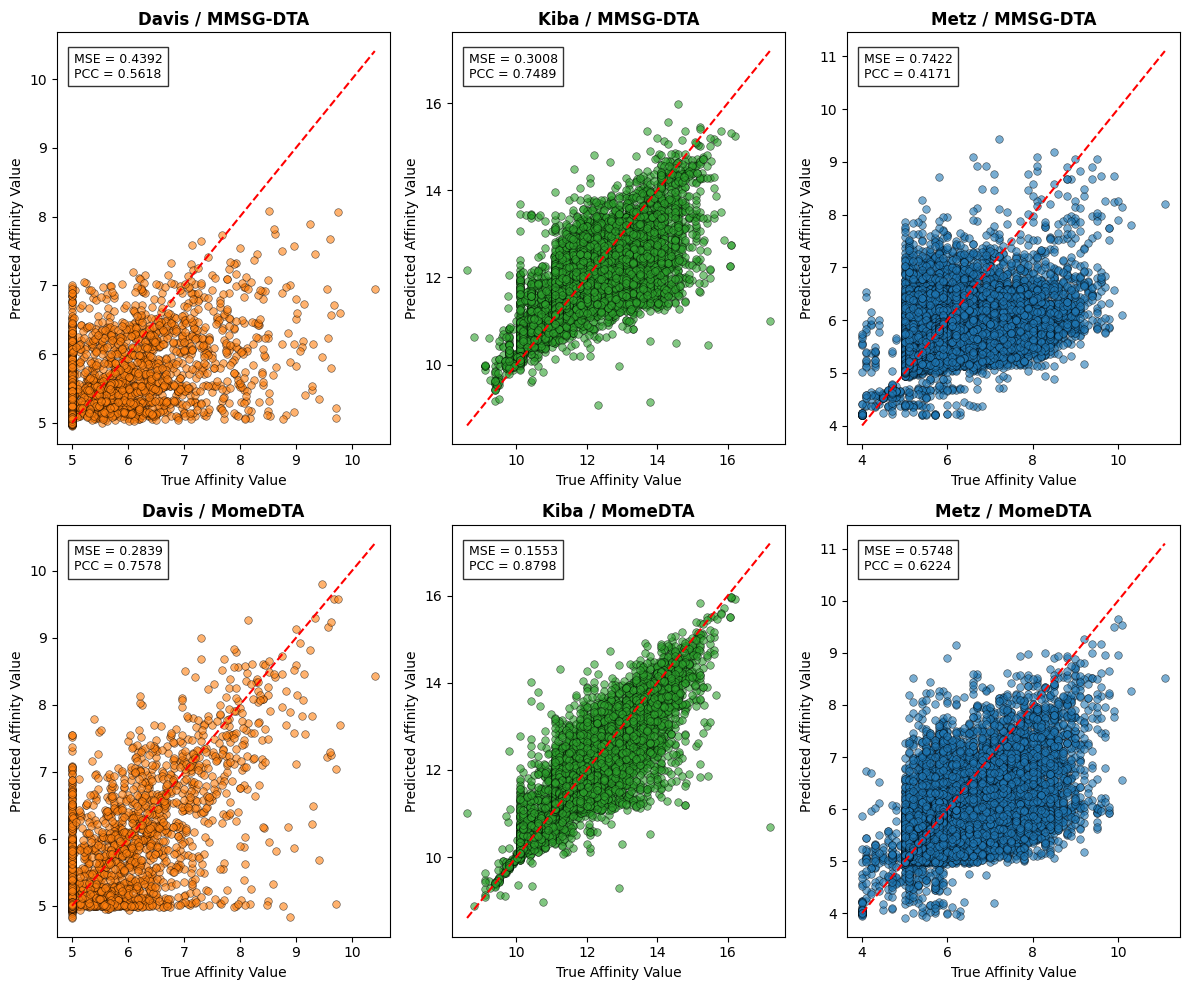

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

this_setting = 'warm'

# 1. 创建2x3子图
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()  # 转为一维数组，方便索引

# 2. 定义绘图函数（避免重复代码）
def plot_scatter(ax, dataset, setting, method, color):
    data = pd.read_csv(path_dict[dataset][setting][method])
    gt = pd.read_csv(gt_dict[dataset])
    data = data.merge(gt, how='inner', on=['drug_id', 'prot_id'])

    true = data['affinity']
    pred = data['logit']
    mse = mean_squared_error(data['affinity'], data['logit'])
    pcc = data[['affinity', 'logit']].corr().iloc[0, 1]
    
    sns.scatterplot(x=true, y=pred, ax=ax, color=color, s=30, alpha=0.6, edgecolor='black')
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 
            'r--', linewidth=1.5, label='Perfect Prediction (y=x)')
    ax.set_xlabel('True Affinity Value', fontsize=10)
    ax.set_ylabel('Predicted Affinity Value', fontsize=10)
    ax.set_title(f'{dataset} / {method}', fontsize=12, fontweight='bold')
    # 标注指标
    ax.text(0.05, 0.95, f'MSE = {mse:.4f}\nPCC = {pcc:.4f}', 
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8),
            fontsize=9, verticalalignment='top')

# 3. 绘制3个模型的子图
plot_scatter(axes[0], 'Davis', this_setting, 'MMSG-DTA', '#ff7f0e')
plot_scatter(axes[1], 'Kiba', this_setting, 'MMSG-DTA', '#2ca02c')
plot_scatter(axes[2], 'Metz', this_setting, 'MMSG-DTA', '#1f77b4')
plot_scatter(axes[3], 'Davis', this_setting, 'MomeDTA', '#ff7f0e')
plot_scatter(axes[4], 'Kiba', this_setting, 'MomeDTA', '#2ca02c')
plot_scatter(axes[5], 'Metz', this_setting, 'MomeDTA', '#1f77b4')

# 5. 全局标题与保存
# plt.suptitle('Affinity Prediction: Predicted vs. True Values', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(f'./logit_vs_gt/{this_setting}_all.jpg', dpi=200, bbox_inches='tight')